## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/divyankrawat/data_science/Dataset/data3/googleplaystore.csv')

## Getting some info about this data

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Finding Null Values

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Finding percentage of missing values per variable

In [7]:
df.isnull().mean()

App               0.000000
Category          0.000000
Rating            0.135965
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000277
dtype: float64

In [8]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

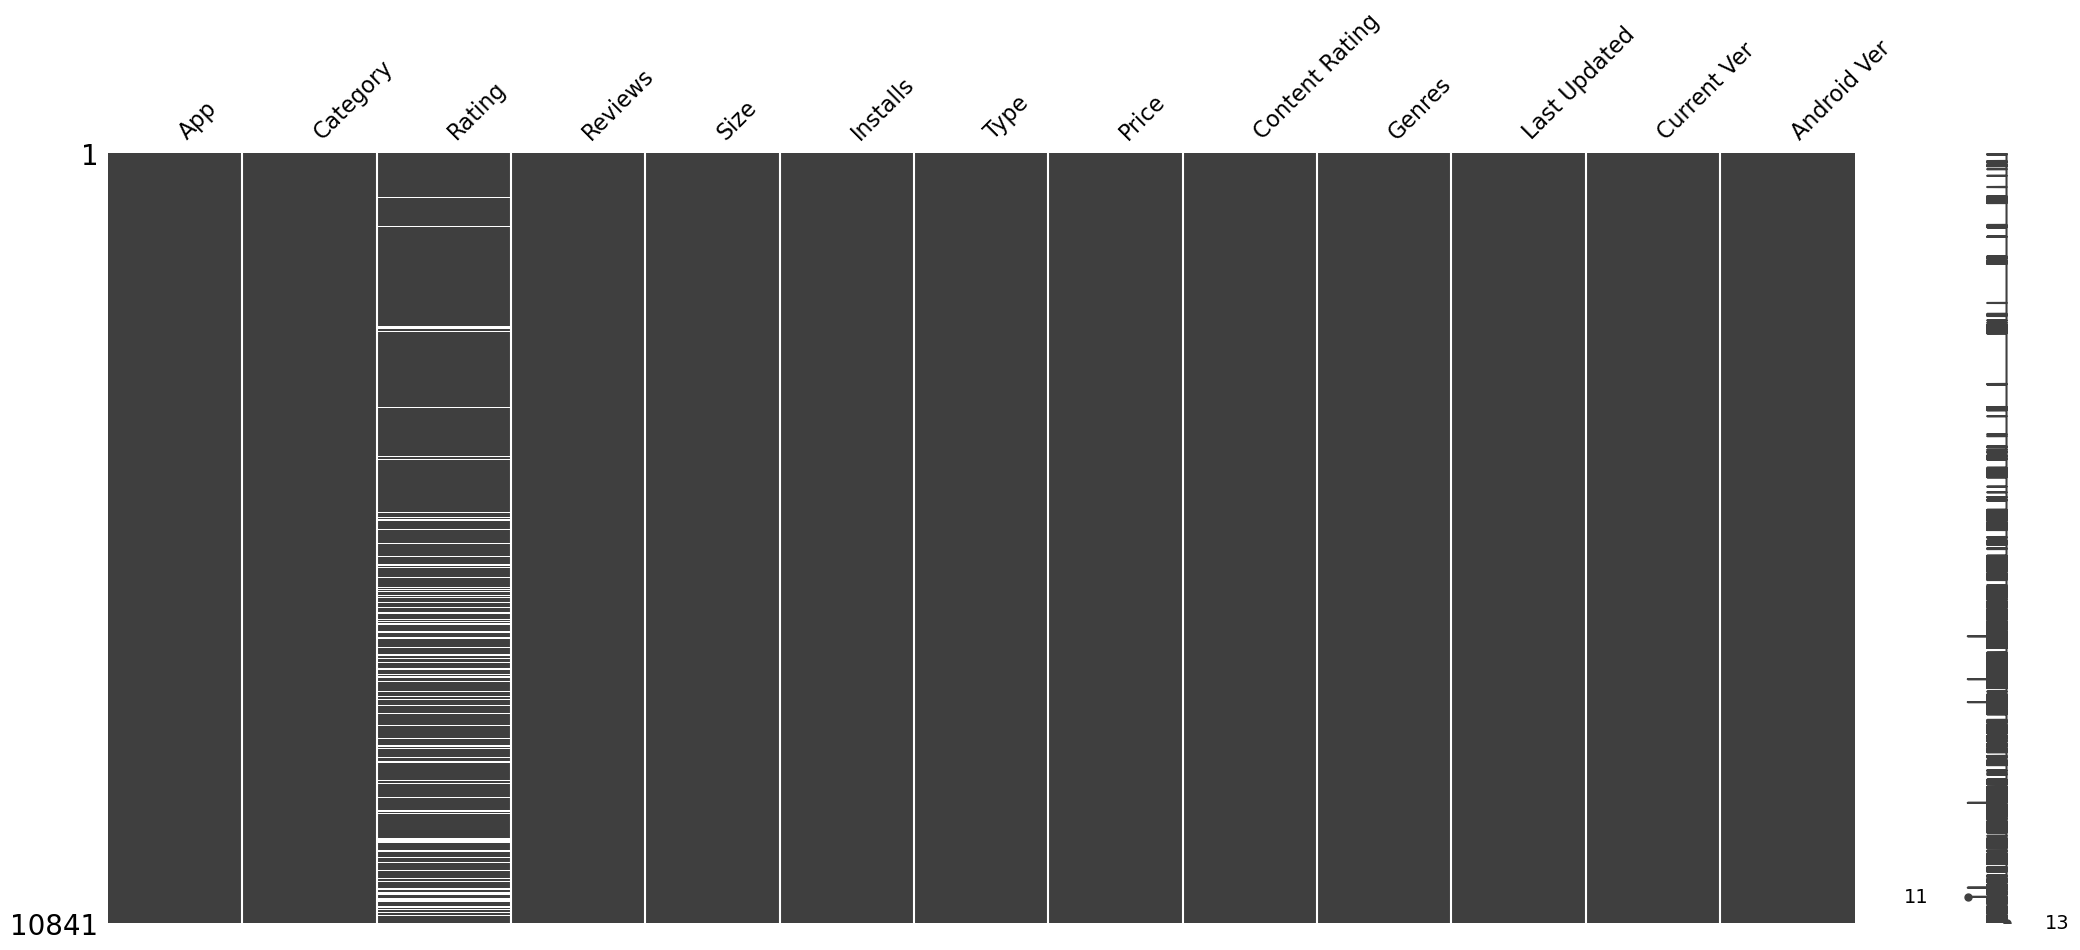

In [9]:
import missingno as msno
msno.matrix(df)

Text(0.5, 1.0, 'Quantifying missing data')

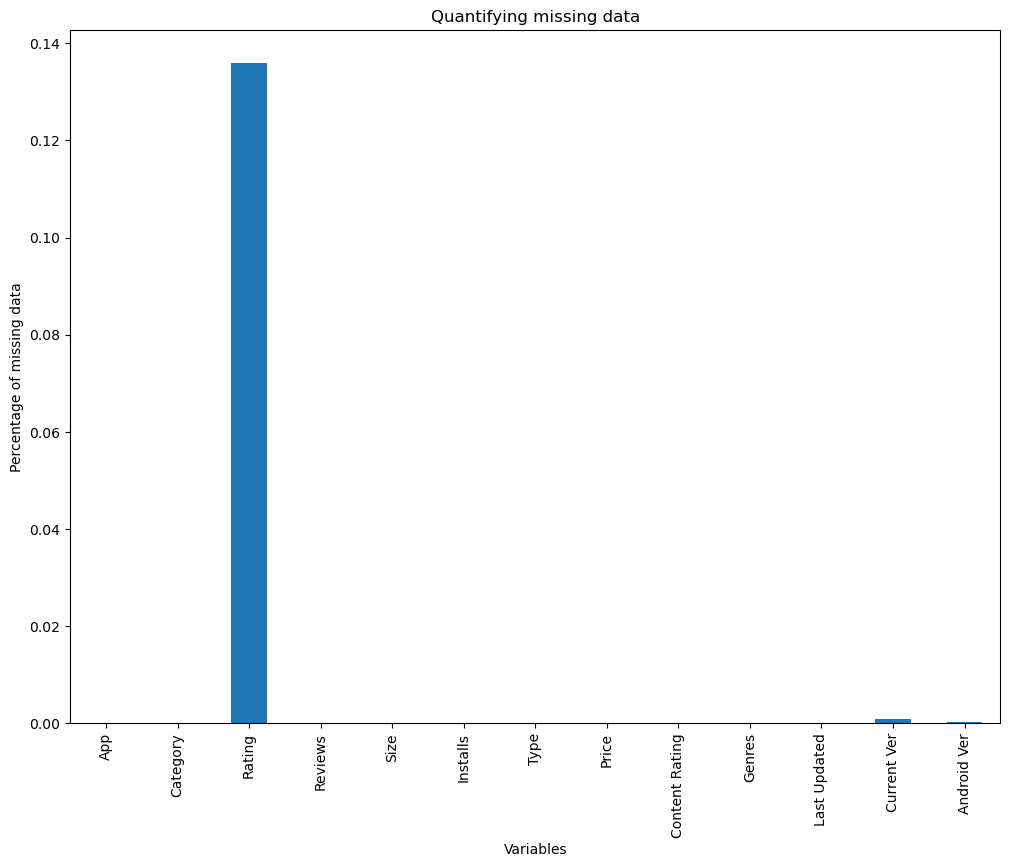

In [10]:
df.isnull().mean().plot.bar(figsize=(12,9))
plt.xlabel('Variables')
plt.ylabel('Percentage of missing data')
plt.title('Quantifying missing data')

## Handling Missing Values

### 1) Removing Rows Having Null Values

In [11]:
df_new = df.dropna()

In [12]:
df_new.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
df_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
print('Number of total observations: {}'.format(len(df)))

Number of total observations: 10841


In [15]:
print('Number of observations after removal of missing values: {}'.format(len(df_new)))

Number of observations after removal of missing values: 9360


### 2) Impute Missing Values With Mean

In [16]:
df['Rating'].mean()

4.193338315362448

In [17]:
df['Rating'] = df['Rating'].replace(np.nan,df['Rating'].mean())

In [18]:
df['Rating']

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10841, dtype: float64

### 3) Impute Missing Values With Median:

In [19]:
df_raw = pd.read_csv("/Users/divyankrawat/data_science/Dataset/data3/googleplaystore.csv")

<AxesSubplot:>

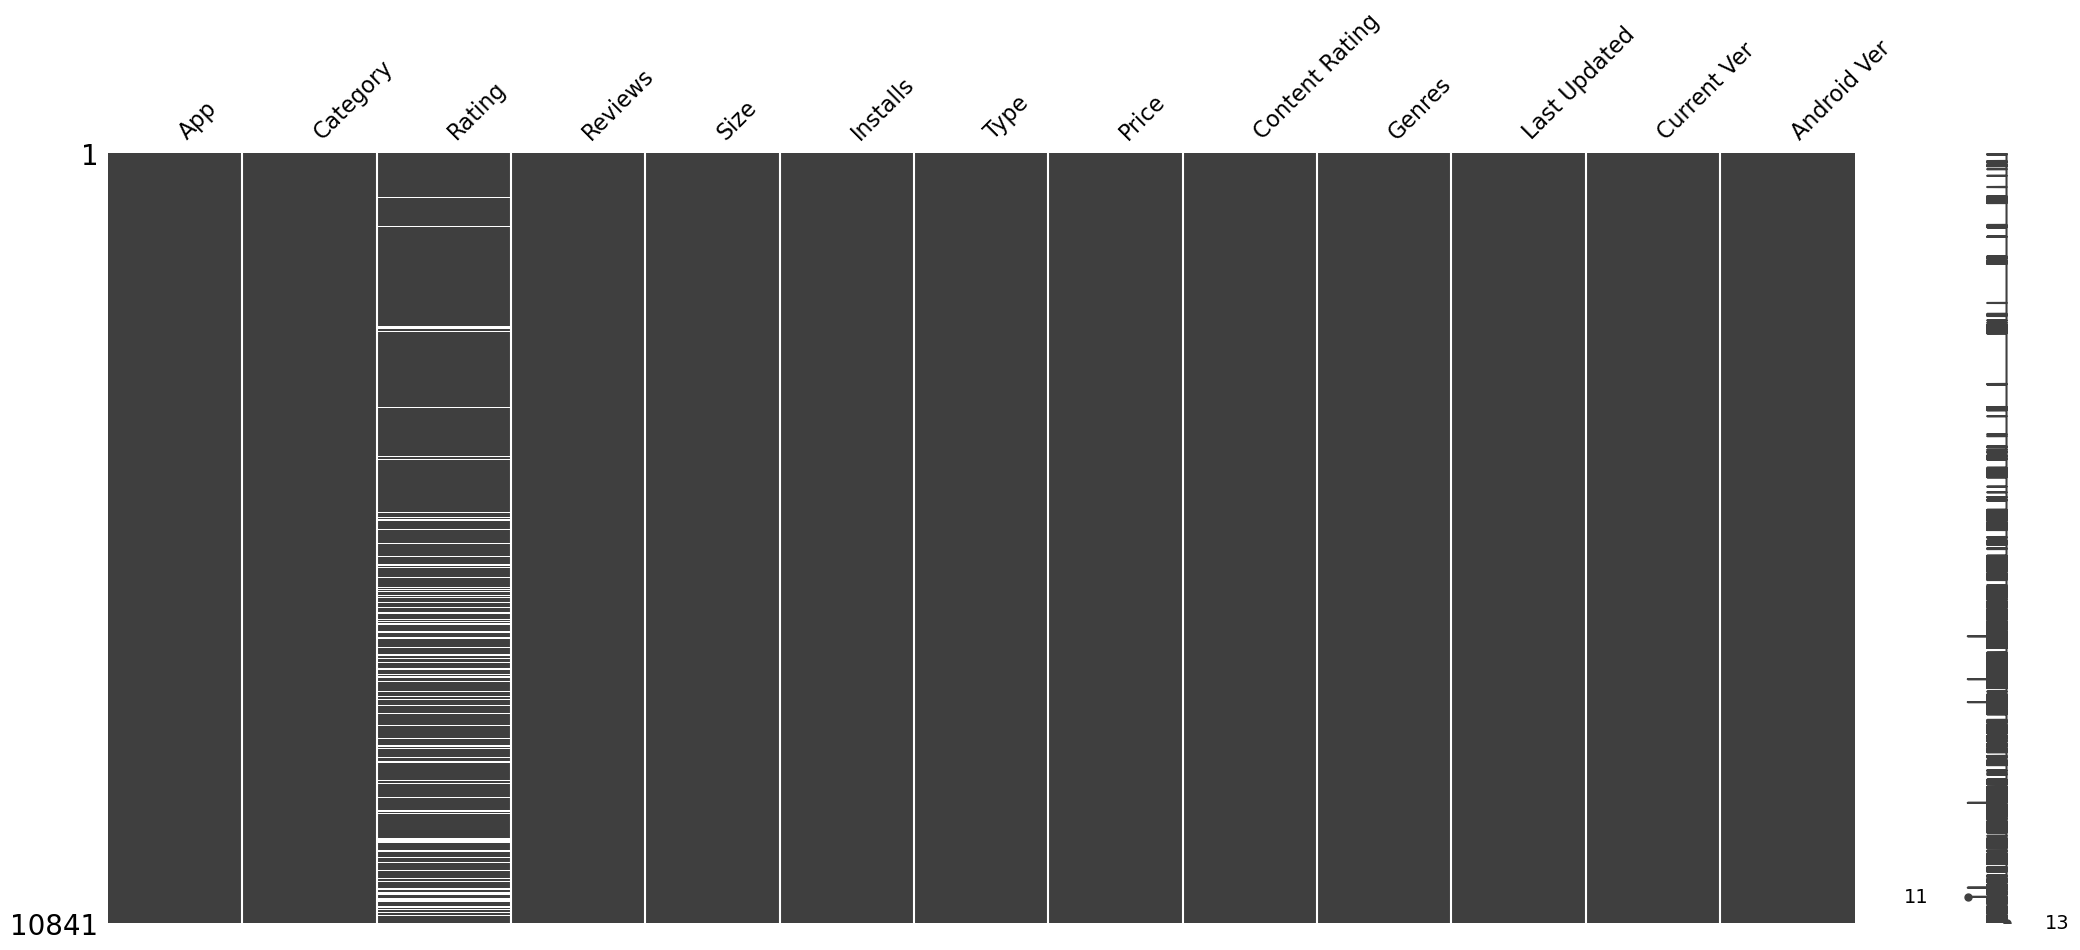

In [20]:
msno.matrix(df_raw)

In [21]:
df_raw['Rating'].median()

4.3

In [22]:
df_raw['Rating'].replace(np.nan,df_raw['Rating'].median())

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

### 4) Imputing Missing Values With Mode:

In [23]:
df_raw['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [24]:
df_raw['Rating'].mode()[0]

4.4

In [25]:
df_raw['Rating'].replace(np.nan,df_raw['Rating'].mode()[0])

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.4
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

### 5) Imputing Method for Categorical Variables

In [26]:
df_raw.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [27]:
df_raw['Type'].dtype

dtype('O')

In [28]:
df_raw['Content Rating'].dtype

dtype('O')

In [29]:
df_raw['Current Ver'].dtype

dtype('O')

In [30]:
df_raw['Android Ver'].dtype

dtype('O')

In [31]:
df_raw['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [32]:
len(df_raw[df_raw['Type'] == 'Paid'])

800

In [33]:
df_raw[df_raw['Type'] == 'Paid']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [34]:
df_raw[df_raw['Type'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [35]:
len(df_raw[df_raw['Type'] == 'Free'])

10039

In [36]:
df_raw['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [37]:
# the above lines make us realize that 'Free' is the most occured type, so we can replace NaN value in type with Free

In [38]:
df_raw["Type"].fillna("Free")

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, Length: 10841, dtype: object

### 6) Replacing Missing Values with Arbitrary Number:

In [39]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import ArbitraryNumberImputer

In [96]:
df_raw['Out'] = 1

In [97]:
X_train,X_test,Y_train,Y_test = train_test_split(df_raw.drop('Out',axis=1),df_raw['Out'],test_size=0.3,random_state=0)

In [98]:
X_train[['Rating']].max()

Rating    5.0
dtype: float64

In [99]:
X_train["Rating"].fillna(5, inplace=True)
X_test["Rating"].fillna(5, inplace=True)

In [100]:
X_train['Rating'].isnull().mean()

0.0

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
               df_raw[['Rating']], df_raw['Out'], test_size=0.3,
               random_state=0)

#### SimpleImputer is used to replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

In [102]:
imputer = SimpleImputer(strategy='constant', fill_value=5)

In [103]:
imputer.fit(X_train)

SimpleImputer(fill_value=5, strategy='constant')

In [104]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

#### ArbitraryNumberImputer is a module in feature-engine package

In [107]:
imputer = ArbitraryNumberImputer(arbitrary_number=5)

In [108]:
imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=5)

In [109]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [114]:
X_train

,x0
0,4.4
1,5.0
2,4.4
3,4.3
4,3.5
...,...
7583,4.5
7584,4.1
7585,4.3
7586,4.7


### 7) Replacing missing values with a value at the end of the distribution

In [111]:
df_raw

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Out
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,1
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1


In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(df_raw.drop('Out',axis=1),df_raw['Out'],test_size=0.3,random_state=0)

In [117]:
IQR = X_train['Rating'].quantile(0.75) - X_train['Rating'].quantile(0.25)
value = X_train["Rating"].quantile(0.75) + 1.5 * IQR
X_train["Rating"] = X_train["Rating"].fillna(value)
X_test["Rating"] = X_test["Rating"].fillna(value)

#### EndTailImputer is a module from feature-engine package

In [119]:
from feature_engine.imputation import EndTailImputer

In [122]:
imputer = EndTailImputer(imputation_method='gaussian', tail='right',variables=['Rating'])

In [123]:
imputer.fit(X_train)

EndTailImputer(variables=['Rating'])

In [124]:
imputer.imputer_dict_

{'Rating': 6.144864006076037}

In [125]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [126]:
X_train

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5191,Extreme- Personal Voice Assistant,PRODUCTIVITY,4.40,25627,9.8M,"1,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",132,5.0 and up
7157,PRIMATURE.CD,NEWS_AND_MAGAZINES,5.25,6,4.8M,100+,Free,0,Everyone,News & Magazines,"October 30, 2017",6.3.7.1,4.1 and up
3184,Flights,TRAVEL_AND_LOCAL,4.40,18039,3.1M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 26, 2018",3.6.6,4.1 and up
1916,Doodle Jump,GAME,4.30,1083571,Varies with device,"50,000,000+",Free,0,Everyone,Arcade,"July 20, 2018",Varies with device,Varies with device
6423,BL 1-Click Camera - Free,PHOTOGRAPHY,3.50,52,1.8M,"10,000+",Free,0,Everyone,Photography,"August 18, 2016",2.0.160818,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,Angry Birds Evolution,FAMILY,4.50,384602,88M,"10,000,000+",Free,0,Everyone,Role Playing,"July 30, 2018",1.21.1,5.0 and up
3264,HTC Lock Screen,TOOLS,4.10,28250,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"March 21, 2017",Varies with device,Varies with device
9845,Empires and Allies,FAMILY,4.30,398746,Varies with device,"10,000,000+",Free,0,Everyone 10+,Strategy,"August 6, 2018",Varies with device,4.1 and up
10799,Fr Daoud Lamei,SOCIAL,4.70,2036,6.8M,"100,000+",Free,0,Everyone,Social,"May 20, 2018",1.72,4.0.3 and up


### 8) Capturing missing values in a bespoke category

In [133]:
from feature_engine.imputation import CategoricalImputer

In [134]:
X_train,X_test,Y_train,Y_test = train_test_split(df_raw.drop('Out',axis=1),df_raw['Out'],test_size=0.3,random_state=0)

In [135]:
df_raw.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Out                  0
dtype: int64

In [137]:
for var in ['Type', 'Content Rating', 'Current Ver', 'Android Ver']:
    X_train[var].fillna('Missing', inplace=True)
    X_test[var].fillna('Missing', inplace=True)

#### SimpleImputer() from scikit-learn will replace missing values with "Missing" in both numerical and categorical variables.

In [138]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing')
imputer.fit(X_train)

SimpleImputer(fill_value='Missing', strategy='constant')

In [139]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [140]:
X_train

array([['Extreme- Personal Voice Assistant', 'PRODUCTIVITY', 4.4, ...,
        'August 5, 2018', '132', '5.0 and up'],
       ['PRIMATURE.CD', 'NEWS_AND_MAGAZINES', 'Missing', ...,
        'October 30, 2017', '6.3.7.1', '4.1 and up'],
       ['Flights', 'TRAVEL_AND_LOCAL', 4.4, ..., 'July 26, 2018',
        '3.6.6', '4.1 and up'],
       ...,
       ['Empires and Allies', 'FAMILY', 4.3, ..., 'August 6, 2018',
        'Varies with device', '4.1 and up'],
       ['Fr Daoud Lamei', 'SOCIAL', 4.7, ..., 'May 20, 2018', '1.72',
        '4.0.3 and up'],
       ['Groupon - Shop Deals, Discounts & Coupons', 'SHOPPING', 4.6,
        ..., 'August 3, 2018', 'Varies with device',
        'Varies with device']], dtype=object)

In [144]:
imputer = CategoricalImputer(imputation_method = 'missing')
imputer.fit(X_train)

CategoricalImputer()

In [145]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [146]:
X_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,Extreme- Personal Voice Assistant,PRODUCTIVITY,4.4,25627,9.8M,"1,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",132,5.0 and up
1,PRIMATURE.CD,NEWS_AND_MAGAZINES,Missing,6,4.8M,100+,Free,0,Everyone,News & Magazines,"October 30, 2017",6.3.7.1,4.1 and up
2,Flights,TRAVEL_AND_LOCAL,4.4,18039,3.1M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 26, 2018",3.6.6,4.1 and up
3,Doodle Jump,GAME,4.3,1083571,Varies with device,"50,000,000+",Free,0,Everyone,Arcade,"July 20, 2018",Varies with device,Varies with device
4,BL 1-Click Camera - Free,PHOTOGRAPHY,3.5,52,1.8M,"10,000+",Free,0,Everyone,Photography,"August 18, 2016",2.0.160818,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,Angry Birds Evolution,FAMILY,4.5,384602,88M,"10,000,000+",Free,0,Everyone,Role Playing,"July 30, 2018",1.21.1,5.0 and up
7584,HTC Lock Screen,TOOLS,4.1,28250,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"March 21, 2017",Varies with device,Varies with device
7585,Empires and Allies,FAMILY,4.3,398746,Varies with device,"10,000,000+",Free,0,Everyone 10+,Strategy,"August 6, 2018",Varies with device,4.1 and up
7586,Fr Daoud Lamei,SOCIAL,4.7,2036,6.8M,"100,000+",Free,0,Everyone,Social,"May 20, 2018",1.72,4.0.3 and up


### 9) Random sample imputation

In [148]:
X_train,X_test,Y_train,Y_test = train_test_split(df_raw.drop('Out',axis=1),df_raw['Out'],test_size=0.3,random_state=0)

In [150]:
from feature_engine.imputation import RandomSampleImputer

In [152]:
imputer = RandomSampleImputer(variables=['Rating'])
imputer.fit(X_train)

RandomSampleImputer(variables=['Rating'])

In [153]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [154]:
X_train

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5191,Extreme- Personal Voice Assistant,PRODUCTIVITY,4.4,25627,9.8M,"1,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",132,5.0 and up
7157,PRIMATURE.CD,NEWS_AND_MAGAZINES,4.3,6,4.8M,100+,Free,0,Everyone,News & Magazines,"October 30, 2017",6.3.7.1,4.1 and up
3184,Flights,TRAVEL_AND_LOCAL,4.4,18039,3.1M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 26, 2018",3.6.6,4.1 and up
1916,Doodle Jump,GAME,4.3,1083571,Varies with device,"50,000,000+",Free,0,Everyone,Arcade,"July 20, 2018",Varies with device,Varies with device
6423,BL 1-Click Camera - Free,PHOTOGRAPHY,3.5,52,1.8M,"10,000+",Free,0,Everyone,Photography,"August 18, 2016",2.0.160818,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,Angry Birds Evolution,FAMILY,4.5,384602,88M,"10,000,000+",Free,0,Everyone,Role Playing,"July 30, 2018",1.21.1,5.0 and up
3264,HTC Lock Screen,TOOLS,4.1,28250,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"March 21, 2017",Varies with device,Varies with device
9845,Empires and Allies,FAMILY,4.3,398746,Varies with device,"10,000,000+",Free,0,Everyone 10+,Strategy,"August 6, 2018",Varies with device,4.1 and up
10799,Fr Daoud Lamei,SOCIAL,4.7,2036,6.8M,"100,000+",Free,0,Everyone,Social,"May 20, 2018",1.72,4.0.3 and up


### 10) Adding a missing value indicator variable

In [156]:
from feature_engine.imputation import AddMissingIndicator

In [158]:
imputer = AddMissingIndicator()

In [159]:
imputer.fit(X_train)

AddMissingIndicator()

In [160]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [161]:
X_test

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_na,Current Ver_na,Android Ver_na
7487,CONTRACT KILLER: ZOMBIES,GAME,4.4,144545,13M,"5,000,000+",Free,0,Teen,Action,"December 1, 2011",1.1.0,2.1 and up,0,0,0
5963,BC Lotto Check,FAMILY,3.0,10,717k,"5,000+",Free,0,Everyone,Entertainment,"June 22, 2016",0.0.7,4.0.3 and up,0,0,0
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,0,0,0
7789,CR Family,FAMILY,2.3,10,5.2M,"1,000+",Free,0,Everyone,Education,"February 8, 2017",1.0.0,4.1 and up,0,0,0
9702,EP Horlogerie,LIFESTYLE,4.9,18,24M,"1,000+",Free,0,Everyone,Lifestyle,"March 28, 2018",4.0.2,4.0.3 and up,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,C Programs and Reference,BOOKS_AND_REFERENCE,4.2,873,2.5M,"50,000+",Free,0,Everyone,Books & Reference,"July 31, 2014",2.2,2.1 and up,0,0,0
7360,FlashLight HD LED Pro,TOOLS,4.7,4928,Varies with device,"50,000+",Paid,$2.99,Everyone,Tools,"July 28, 2018",Varies with device,Varies with device,0,0,0
10035,Deus Ex GO,FAMILY,4.5,9699,23M,"100,000+",Paid,$0.99,Teen,Puzzle,"July 23, 2018",2.1.111374,4.2 and up,0,0,0
9433,Crack the blue angry birds egg,FAMILY,3.2,85,2.1M,"10,000+",Free,0,Everyone,Puzzle,"April 22, 2016",1.0.0,2.1 and up,0,0,0
